# I Applied Math and Machine Learning Basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## See the docs for more info on linear algebra routines

https://docs.scipy.org/doc/numpy/reference/routines.linalg.html

## 2 Linear Algebra

### 2.1 Scalars, Vectors, Matrices, and Tensors

In [2]:
x = 1.0
v = np.array([1.0, 2.0])
A = np.array([1.0, 2.0, 3.0, 4.0]).reshape(2,2)
T = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]).reshape(2,2,2)


In [3]:
v

array([ 1.,  2.])

In [4]:
A

array([[ 1.,  2.],
       [ 3.,  4.]])

In [5]:
A[:,0] # first column of A

array([ 1.,  3.])

In [6]:
A[0,:] # first row of A

array([ 1.,  2.])

In [7]:
T

array([[[ 1.,  2.],
        [ 3.,  4.]],

       [[ 5.,  6.],
        [ 7.,  8.]]])

### 2.2 Multiplying Matrices and Vectors

In [8]:
print(A, v)

[[ 1.  2.]
 [ 3.  4.]] [ 1.  2.]


In [9]:
A * v  # WRONG! -- scales each row of A by the vector v

array([[ 1.,  4.],
       [ 3.,  8.]])

In [10]:
all(A @ v == A.dot(v))  # use python matrix multiply op `@` or .dot method

True

### 2.3 Identity and Inverse Matrices

In [11]:
from numpy.linalg import inv

In [12]:
np.eye(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [13]:
inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [14]:
A @ inv(A)

array([[  1.00000000e+00,   0.00000000e+00],
       [  8.88178420e-16,   1.00000000e+00]])

### 2.4 Linear Dependence and Span

### 2.5 Norms

In [15]:
from numpy.linalg import norm

#### Vector norms

In [16]:
v

array([ 1.,  2.])

In [17]:
norm(v,1)

3.0

In [18]:
norm(v)  # default is 2-norm

2.2360679774997898

In [19]:
norm(v,4)

2.0305431848689306

In [20]:
norm(v,np.inf)

2.0

#### Matrix norms

In [21]:
A

array([[ 1.,  2.],
       [ 3.,  4.]])

In [22]:
norm(A)  # Frobenius norm

5.4772255750516612

### 2.6 Special Kinds of Matrices and Vectors

### 2.7 Eigendecomposition

In [23]:
from numpy.linalg import eig, eigvals

In [24]:
eigvals(A)

array([-0.37228132,  5.37228132])

In [25]:
eig(A)[1]  # eigenvectors as columns

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

In [26]:
Q = eig(A)[1]                # matrix of eigenvectors
L = np.diag( eigvals(A) )    # matrix w eigenvals on diagonal

In [27]:
Q @ L @ inv(Q)

array([[ 1.,  2.],
       [ 3.,  4.]])

### 2.8 Singular Value Decomposition

In [28]:
from numpy.linalg import svd

In [29]:
U, sigmas, V = svd(A)

In [30]:
U @ np.diag(sigmas) @ V

array([[ 1.,  2.],
       [ 3.,  4.]])

### 2.9 The Moore-Penrose Pseudoinverse

In [31]:
from numpy.linalg import lstsq

Find the best-fitting affine model $y = b + mx$ to the $(x,y)$ data points $(0,3.9)$, $(1,3.2)$, and $(2,1.9)$.

In [32]:
X = np.array([[0, 1, 2]]).T           # x values
y = np.array([[3.9, 3.2, 1.9]]).T     # y values

# prefix a column of ones for affine model
Xpr = np.hstack( [np.ones((3,1)), X] ) 

lstsq(Xpr, y)

(array([[ 4.],
        [-1.]]), array([ 0.06]), 2, array([ 2.6762432 ,  0.91527173]))

So the best fitting line is $y = 4 -x$.

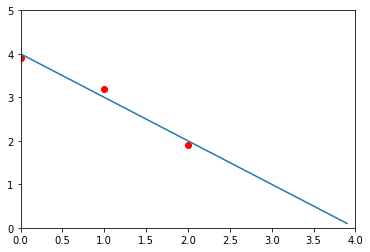

In [33]:
# points
plt.plot(X, y, 'ro')

# line of best fit
xtmp = np.arange(0,4,0.1)
plt.plot(xtmp, 4-xtmp)

# do it!
plt.axis([0, 4, 0, 5])
plt.show()

### 2.10 The Trace Operator

In [34]:
A

array([[ 1.,  2.],
       [ 3.,  4.]])

In [35]:
np.trace(A)

5.0

### 2.11 The Determinant

In [36]:
from numpy.linalg import det

In [37]:
A

array([[ 1.,  2.],
       [ 3.,  4.]])

In [38]:
det(A)

-2.0000000000000004

### 2.12 Example: Principal Components Analysis